In [ ]:
print("Ganesh")
print("223031240209")
print("practical-6")
import math
import pandas as pd
from graphviz import Digraph
from IPython.display import Image

Ganesh
223031240209
practical-6


In [ ]:
def calculate_entropy(dataset):
    class_counts = dataset.iloc[:, -1].value_counts()
    total_instances = len(dataset)
    entropy = 0
    for count in class_counts:
      probability = count / total_instances
      entropy -= probability * math.log2(probability)
    return entropy

In [ ]:
def build_decision_tree(dataset,attributes,parent_node=None,graph=None):
  if graph is None:
    graph = Digraph('Decision Tree')
  if len(dataset.iloc[:,-1].unique()) == 1:
    leaf = dataset.iloc[0,-1]
    graph.node(parent_node,label=leaf,shape='ellipse',style='filled',color='lightblue')
    return leaf
  if len(attributes) == 0:
    majoority_class = dataset.iloc[:,-1].mode()[0]
    graph.node(parent_node,label=str(majoority_class[0]),shape='ellipse',style='filled',color='lightblue')
    return majority_class
  best_attribute = max(attributes,key=lambda attr:calculate_information_gain(dataset,attr))
  graph.node(parent_node,label=best_attribute,shape='ellipse',style='filled',color='lightyellow')
  attribute_values = dataset[best_attribute].unique()
  for value in attribute_values:
    subset = dataset[dataset[best_attribute] == value].drop(columns=[best_attribute])
    child_node = f'{parent_node}_{value}'
    graph.edge(parent_node,child_node,label=value)
    build_decision_tree(subset,[attr for attr in attributes if attr != best_attribute],child_node,graph)
  return graph

In [ ]:
data = {
    'Age':['Young','Young','Middle-aged','Old','Old','Old'],
    'Income':['High','High','Low','Medium','High','Low'],
    'Student':['Yes','No','No','Yes','Yes','No'],
    'Buys computer':['Yes','No','Yes','No','Yes','No']
}
dataset = pd.DataFrame(data)
attributes = ['Age','Income','Student']

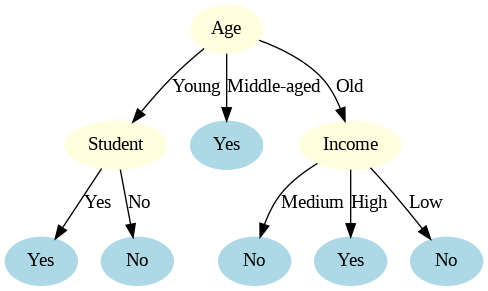

In [ ]:
import math
import pandas as pd
from graphviz import Digraph
from IPython.display import Image

def calculate_entropy(dataset):
    class_counts = dataset.iloc[:, -1].value_counts()
    total_instances = len(dataset)
    entropy = 0
    for count in class_counts:
        probability = count / total_instances
        entropy -= probability * math.log2(probability)
    return entropy

def calculate_information_gain(dataset, attribute):
    """Calculates the information gain of an attribute in a dataset.

    Args:
        dataset: The dataset (pandas DataFrame).
        attribute: The attribute to calculate information gain for.

    Returns:
        The information gain of the attribute.
    """
    total_entropy = calculate_entropy(dataset)
    attribute_values = dataset[attribute].unique()
    weighted_entropy = 0
    for value in attribute_values:
        subset = dataset[dataset[attribute] == value]
        subset_entropy = calculate_entropy(subset)
        weighted_entropy += (len(subset) / len(dataset)) * subset_entropy
    information_gain = total_entropy - weighted_entropy
    return information_gain

def build_decision_tree(dataset, attributes, parent_node=None, graph=None):
    if graph is None:
        graph = Digraph('Decision Tree')
    if len(dataset.iloc[:, -1].unique()) == 1:
        leaf = dataset.iloc[0, -1]
        graph.node(parent_node, label=leaf, shape='ellipse', style='filled', color='lightblue')
        return leaf
    if len(attributes) == 0:
        majority_class = dataset.iloc[:, -1].mode()[0]
        graph.node(parent_node, label=str(majority_class), shape='ellipse', style='filled', color='lightblue')
        return majority_class
    best_attribute = max(attributes, key=lambda attr: calculate_information_gain(dataset, attr))
    graph.node(parent_node, label=best_attribute, shape='ellipse', style='filled', color='lightyellow')
    attribute_values = dataset[best_attribute].unique()
    for value in attribute_values:
        subset = dataset[dataset[best_attribute] == value].drop(columns=[best_attribute])
        child_node = f'{parent_node}_{value}'
        graph.edge(parent_node, child_node, label=value)
        build_decision_tree(subset, [attr for attr in attributes if attr != best_attribute], child_node, graph)
    return graph

data = {
    'Age': ['Young', 'Young', 'Middle-aged', 'Old', 'Old', 'Old'],
    'Income': ['High', 'High', 'Low', 'Medium', 'High', 'Low'],
    'Student': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No'],
    'Buys computer': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}
dataset = pd.DataFrame(data)
attributes = ['Age', 'Income', 'Student']

graph = build_decision_tree(dataset, attributes, 'Root')
graph.render('decision_tree', format='png')
Image(filename='decision_tree.png')